# Import Data

In [23]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from datetime import datetime,date
import copy
url = 'https://github.com/PisutSukpool/BADS7105-CRM-analytics-and-intelligence/raw/main/Homework%2001/Customer%20Behaviors%20(Responses).xls' 
df = pd.read_excel(url) 

# Config Thai Characters

In [25]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [26]:
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font',family='TH Sarabun New',size=20)

# Cleansing Dataframe

In [27]:
today = datetime.today()
df_encode = pd.DataFrame()
ls=[]
df = df.drop(columns=['Timestamp'])
df.index = np.arange(1, len(df)+1)
df.columns = df.columns.str.replace('คุณมีความสนใจในสิ่งเหล่านี้มากน้อยเพียงใด','Interest')
df.columns = df.columns.str.replace('คุณบริโภคสิ่งเหล่านี้บ่อยขนาดไหน','Consume')
df.columns = df.columns.str.replace('นอกเหนือจากรายการดังกล่าวแล้ว คุณมีความสนใจในเรื่องใดอีกบ้าง','Addition') 
df.columns = df.columns.str.replace('คุณเกิดวันที่เท่าไหร่','BirthDay')
df.columns = df.columns.str.replace('เพศ','Gender')
df = df.assign(key = [int(index) for index, row in df.iterrows()])
df = df.assign(today = [today for i in df['key']])
for index, row in df.iterrows():
    if row['BirthDay'].year > date.today().year:
        row['BirthDay'] = row['BirthDay'] - relativedelta(years=543)
    else:
        row['BirthDay']
    ls.append([int(index),row['BirthDay']])
df_prep_date = pd.DataFrame(ls,columns=['key','BD_cls'])
df_cls = pd.merge(df, df_prep_date, on =['key', 'key'])
df_cls['Age'] = round(((df_cls['today']-df_cls['BD_cls']).dt.days)/365)
df_cls = df_cls.drop(columns= ['today','BirthDay','BD_cls'])
df_option = df_cls[['key', 'Addition']].copy()
df_cls = df_cls.drop(columns= ['Addition'])
df_cls

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง],Consume [อาหารญี่ปุ่น],Consume [อาหารจึน],Consume [อาหารไทย],Consume [อาหารอีสาน],Consume [อาหารสุขภาพ],Consume [บุฟเฟต์],Consume [ชาบูชาบู],Consume [ปิ้งย่าง],Consume [เหล้าเบียร์],Consume [เสื้อผ้าแฟชั่น],Consume [แต่งหน้า],Consume [skincare บำรุงผิว],Consume [การออกกำลังกาย],Consume [การเล่นเกมส์],Consume [การท่องเที่ยว],Consume [การอ่านหนังสือ],Consume [การอ่านบทความ Online],Consume [การเรียน e-learning],Consume [ดู Series],Consume [ดูหนัง],Consume [ดู Youtube],Consume [ดู Netflix],Consume [Content ด้านบันเทิง],Consume [Content เกี่่ยวกับเกมส์],Consume [Content เกี่ยวกับการ review ร้านอาหาร],Consume [Content เกี่ยวกับการท่องเที่ยว],Consume [Content เกี่ยวกับการแต่งบ้าน],Consume [Content เกี่ยวกับการโทรทัศน์],Consume [Content เกี่ยวกับละคร],Consume [Content เกี่ยวกับการเมือง],Gender,key,Age
0,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,สนใจ,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจ,สนใจอย่างมาก,สนใจอย่างมาก,เฉยๆ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมากที่สุด,เดือนละ 2-3 ครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,ชาย,1,32.0
1,สนใจอย่างมาก,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมาก,สนใจ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,เฉยๆ,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,เฉยๆ,เฉยๆ,สนใจอย่างมาก,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,ไม่สนใจ,สนใจ,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,อาทิตย์ละครั้ง,อาทิตย์ละครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,เดือนละครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,อาทิตย์ละครั้ง,หลายเดือนครั้ง,หลายเดือนครั้ง,อาทิตย์ละครั้ง,หญิง,2,28.0
2,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมาก,สนใจ,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,เฉยๆ,ไม่สนใจอย่างมากที่สุด,ไม่สนใจอย่างมาก,สนใจ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,เฉยๆ,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมากที่สุด,สนใจอย่างมาก,ไม่สนใจ,สนใจอย่างมากที่สุด,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,หลายเดือนครั้ง,หลายเดือนครั้ง,เดือนละครั้ง,เดือนละครั้ง,เดือนละครั้ง,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,แทบไม่ได้บริโภคเลย,หลายเดือนครั้ง,อาทิตย์ละครั้ง,หลายเดือนครั้ง,แทบทุกวัน,เดือนละ 2-3 ครั้ง,เดือนละ 2-3 ครั้ง,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,แทบทุกวัน,เดือนละ 2-3 ครั

In [28]:
mapper = {'ไม่สนใจอย่างมากที่สุด' : 1 ,'ไม่สนใจอย่างมาก' : 2 ,'ไม่สนใจ' : 3 ,'เฉยๆ' : 4 
          ,'สนใจ' : 5 ,'สนใจอย่างมาก' : 6 ,'สนใจอย่างมากที่สุด' : 7 ,

          'แทบไม่ได้บริโภคเลย' : 1 ,'หลายเดือนครั้ง' : 2 ,'เดือนละครั้ง' : 3 ,
          'เดือนละ 2-3 ครั้ง' : 4 ,'อาทิตย์ละครั้ง' : 5 ,'แทบทุกวัน' : 6 ,
          
          'ชาย' : 0 ,'หญิง' : 1 ,'ไม่ต้องการระบุ' : 2
         }
df_encode = df_cls.replace(mapper)

# Data Profiling

In [29]:
import copy
avg_profile=[]
avg_pair=[]
for col in df_encode:
  avg_pair.append(col)
  avg_pair.append(df_encode[col].mean())
  avg_pair.append(df_encode[col].std())
  avg_pair.append(df_encode[col].min())
  avg_pair.append(df_encode[col].max())
  avg_pair.append(df_encode[col].median())
  avg_pair.append(df_encode[col].mode()[0])
  avg_profile.append(avg_pair)
  avg_pair=[] 
df_avg = pd.DataFrame(avg_profile,columns=['Features','Mean','Standard Deviation','Min','Max','Median','Mode'])  
enter_sort = int(input('Enter Sort by : '))
if enter_sort == 1:
  df_avg_sort=df_avg.sort_values(by='Mean', ascending=False)    
elif enter_sort == 2:   
  df_avg_sort=df_avg_f.sort_values(by='Standard Deviation', ascending=False) 
#df_avg_f = df_avg_sort.drop(df_avg_sort[(df_avg_sort.Features == 'key') & (df_avg_sort.Features == 'Age')].index)     
df_avg_sort.iloc[2:].head(10)      

Enter Sort by : 1


,Features,Mean,Standard Deviation,Min,Max,Median,Mode
0,Interest [อาหารญี่ปุ่น],6.079365,0.903427,4.0,7.0,6.0,7.0
14,Interest [การท่องเที่ยว],6.031746,1.092028,2.0,7.0,6.0,7.0
19,Interest [ดูหนัง],5.714286,1.084027,2.0,7.0,6.0,5.0
32,Consume [อาหารไทย],5.714286,0.727979,3.0,6.0,6.0,6.0
21,Interest [ดู Netflix],5.698413,1.041632,3.0,7.0,6.0,6.0
6,Interest [ชาบูชาบู],5.682540,1.059906,3.0,7.0,6.0,6.0
2,Interest [อาหารไทย],5.634921,1.082136,1.0,7.0,6.0,5.0
7,Interest [ปิ้งย่าง],5.603175,1.040156,3.0,7.0,6.0,5.0
20,Interest [ดู Youtube],5.603175,1.100435,2.0,7.0,6.0,5.0
18,Interest [ดู Series],5.587302,1.087093,3.0,7.0,6.0,5.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


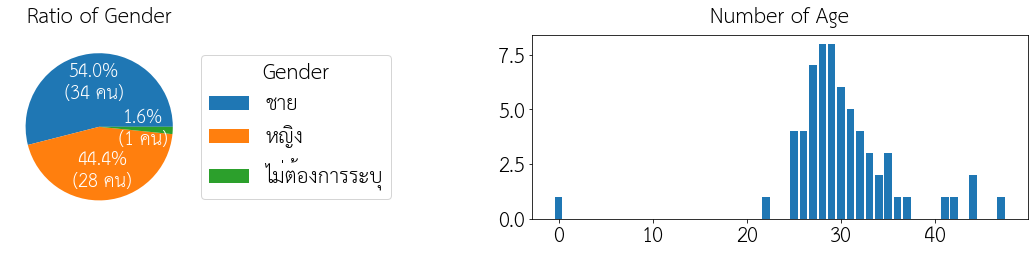

In [30]:
#Gender
df_cls_gender= df_cls.groupby(by=['Gender']).count().to_records()
df_count_gender = pd.DataFrame([[df_cls_gender[i][0] ,df_cls_gender[i][1]] for i in range(len(df_cls_gender))],columns=['Gender','Count'])
df_count_gender = df_count_gender.set_index('Gender')

#Age
df_cls_age= df_cls.groupby(by=['Age']).count().to_records()
df_count_age = pd.DataFrame([[df_cls_age[i][0] ,df_cls_age[i][1]] for i in range(len(df_cls_age))],columns=['Age','Count'])
df_count_age = df_count_age.set_index('Age')
df_count_age

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} คน)".format(pct, absolute)

f, ax = plt.subplots(1, 2)
wedges, texts, autotexts = ax[0].pie(df_count_gender,labels=df_count_gender.index,autopct=lambda pct: func(pct, df_count_gender),
                                                   textprops=dict(color="w"))
ax[1].bar(df_count_age.index,df_count_age['Count'])
ax[0].legend(wedges, df_count_gender.index,
          title="Gender",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=18, weight="bold")
ax[0].set_title('Ratio of Gender', fontdict={'fontsize':20}, pad=12)
ax[1].set_title('Number of Age', fontdict={'fontsize':20}, pad=12)
f.set_figheight(5) 
f.set_figwidth(18)
f.tight_layout(pad=3)
plt.show()

In [31]:
int_cols = [col for col in df_encode.columns if 'Interest' in col or 'Gender' in col or 'Age' in col]
df_encode_interest = df_encode[int_cols].copy()  
df_encode_interest
df_corr_interest= round(df_encode_interest.corr(method='spearman'),2)

In [32]:
con_cols = [col for col in df_encode.columns if 'Consume' in col or 'Gender' in col or 'Age' in col]
df_encode_consume = df_encode[con_cols].copy()  
df_encode_consume
df_corr_consume= round(df_encode_consume.corr(method='spearman'),2)

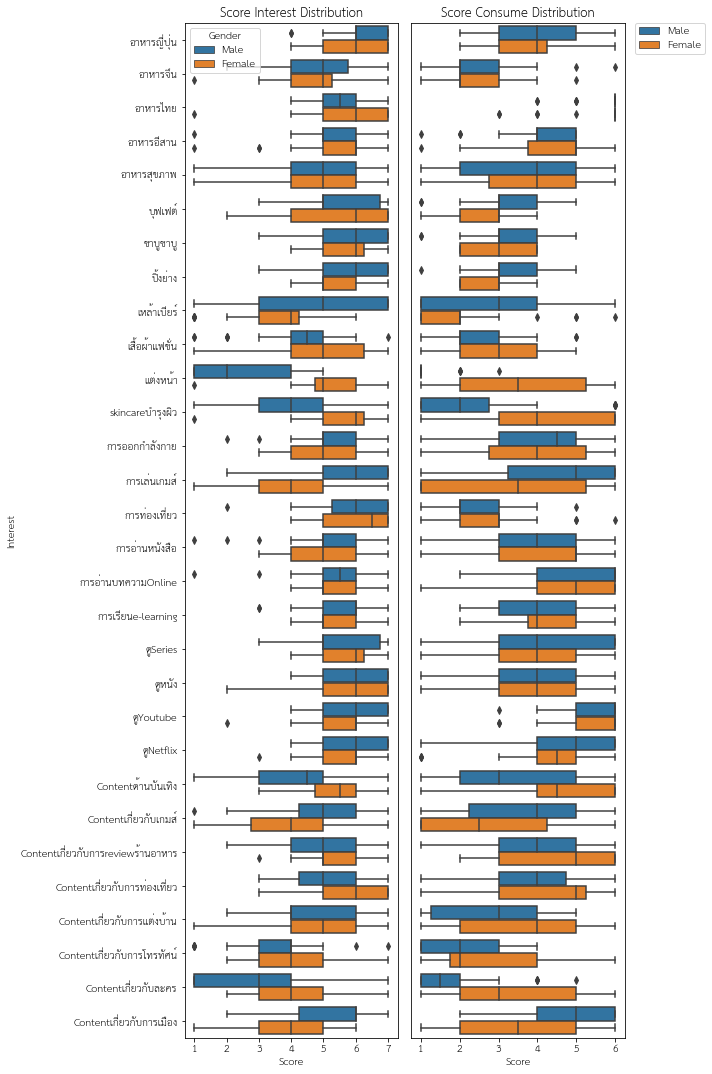

In [44]:
#Interest--------------------------------------------------------------------------------------------------------------------
df_encode_interest_da = df_encode_interest.drop(columns=['Age'])
df_encode_interest_da = df_encode_interest_da.drop(df_encode_interest_da[df_encode_interest_da.Gender == 2].index)

df_compare_interest=[]
for col in df_encode_interest_da:
  for index,row in df_encode_interest_da.iterrows():
    if col != 'Gender':
      df_compare_interest.append([col,row[col],row['Gender']])
df_box_interest=pd.DataFrame(df_compare_interest,columns=['Interest','Score','Gender'])
df_box_interest.loc[df_box_interest.Gender == 0, 'Gender'] = 'Male'
df_box_interest.loc[df_box_interest.Gender == 1, 'Gender'] = 'Female'
df_box_interest['Interest'] = df_box_interest['Interest'].str.replace('Interest','')
df_box_interest['Interest'] = df_box_interest['Interest'].str.replace('[','')
df_box_interest['Interest'] = df_box_interest['Interest'].str.replace(']','')
df_box_interest['Interest'] = df_box_interest['Interest'].str.replace(' ','')

#Consume--------------------------------------------------------------------------------------------------------------------
df_encode_consume_da = df_encode_consume.drop(columns=['Age'])
df_encode_consume_da = df_encode_consume_da.drop(df_encode_consume_da[df_encode_consume_da.Gender == 2].index)

df_compare_consume=[]
for col in df_encode_consume_da:
  for index,row in df_encode_consume_da.iterrows():
    if col != 'Gender':
      df_compare_consume.append([col,row[col],row['Gender']])
df_box_consume=pd.DataFrame(df_compare_consume,columns=['Interest','Score','Gender'])
df_box_consume.loc[df_box_consume.Gender == 0, 'Gender'] = 'Male'
df_box_consume.loc[df_box_consume.Gender == 1, 'Gender'] = 'Female'

#Box Plot to compare--------------------------------------------------------------------------------------------------------
f, axes = plt.subplots(1, 2)
box_interest= sns.boxplot(x='Score',y='Interest',hue='Gender',data=df_box_interest,orient = 'h', ax=axes[0])
box_consume = sns.boxplot(x='Score',y='Interest',hue='Gender',data=df_box_consume,orient = 'h', ax=axes[1])
box_consume.axes.get_yaxis().set_visible(False)
axes[0].set_title('Score Interest Distribution')
axes[1].set_title('Score Consume Distribution')
f.set_figheight(15) 
f.set_figwidth(10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
f.tight_layout(pad=1)

#Interest Correlation

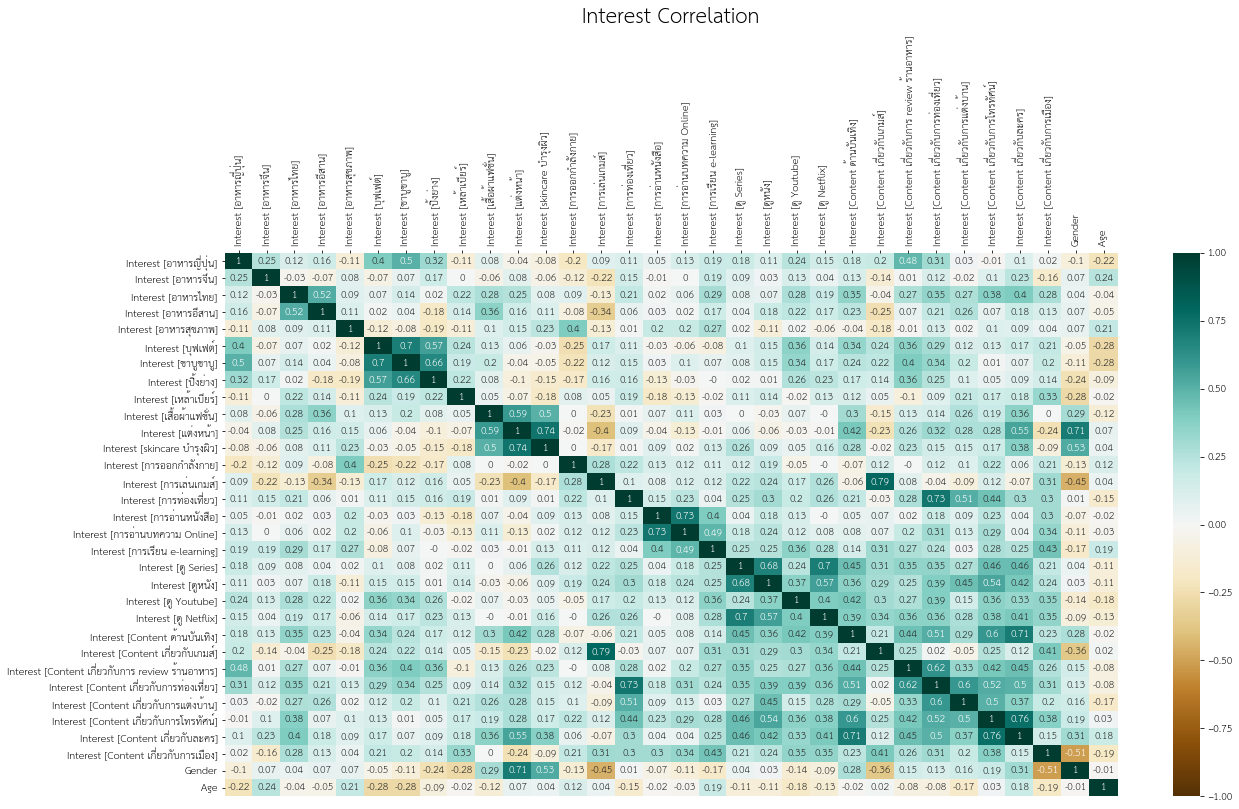

In [34]:
mpl.rcParams.update({'font.size': 10})
plt.figure(figsize=(20, 10))
hm_interest = sns.heatmap(df_corr_interest, vmin=-1, vmax=1, annot=True, cmap='BrBG')
hm_interest.set_title('Interest Correlation', fontdict={'fontsize':20}, pad=12);
hm_interest.set_xticklabels(hm_interest.get_xticklabels(), rotation=90)
hm_interest.xaxis.tick_top()
hm_interest.xaxis.set_label_position('top')
plt.show()

In [35]:
#eliminate duplicate pairs
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
    
#align left
def left_align(df):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'})
    left_aligned_df = left_aligned_df.set_table_styles(
        [dict(selector='th', props=[('text-align', 'left')])]
    )
    return left_aligned_df

**Top Interest Correlation Positive**

In [36]:
#Top Interest correlation positive
labels_to_drop = get_redundant_pairs(df_encode_interest)
corr_interest_top_pos = df_corr_interest.unstack()
corr_interest_top_pos = corr_interest_top_pos.drop(labels=labels_to_drop).sort_values(ascending=False)
top_corr_interest = corr_interest_top_pos.head(20).to_frame(name='Correlation')
left_align(top_corr_interest)

**Top Interest Correlation Negative**


In [37]:
labels_to_drop = get_redundant_pairs(df_encode_interest)
corr_interest_top_pos = df_corr_interest.unstack()
corr_interest_top_pos = corr_interest_top_pos.drop(labels=labels_to_drop).sort_values(ascending=True)
top_corr_interest = corr_interest_top_pos.head(20).to_frame(name='Correlation')
left_align(top_corr_interest)

,,Correlation
Interest [Content เกี่ยวกับการเมือง],Gender,-0.510000
Interest [การเล่นเกมส์],Gender,-0.450000
Interest [แต่งหน้า],Interest [การเล่นเกมส์],-0.400000
Interest [Content เกี่่ยวกับเกมส์],Gender,-0.360000
Interest [อาหารอีสาน],Interest [การเล่นเกมส์],-0.340000
Interest [ชาบูชาบู],Age,-0.280000
Interest [บุฟเฟต์],Age,-0.280000
Interest [เหล้าเบียร์],Gender,-0.280000
Interest [อาหารอีสาน],Interest [Content เกี่่ยวกับเกมส์],-0.250000
Interest [บุฟเฟต์],Interest [การออกกำลังกาย],-0.250000


In [38]:
df_encode_interest_dg = df_encode_interest.drop(columns=['Age','Gender'])
df_interest = pd.DataFrame([ col for col in df_encode_interest_dg],columns=['Interest'])
df_gender_all = pd.DataFrame([ col for col in df['Gender']],columns=['Gender'])
df_gender = pd.DataFrame(df_gender_all.Gender.unique(),columns=['Gender'])
df_gender = df_gender.drop([2])
df_score =  pd.DataFrame([1,2,3,4,5,6,7],columns=['Score'])
ls_pairs = []
ls_row = []
for intr in df_interest['Interest']:
  for gd in df_gender['Gender']:
    ls_pairs.append(intr)
    ls_pairs.append(gd)
    ls_pairs_d = copy.deepcopy(ls_pairs)
    ls_row.append(ls_pairs_d)
    ls_pairs.clear()
df_cate = pd.DataFrame(ls_row, columns=['Interest','Gender'])

#Consume Correlation

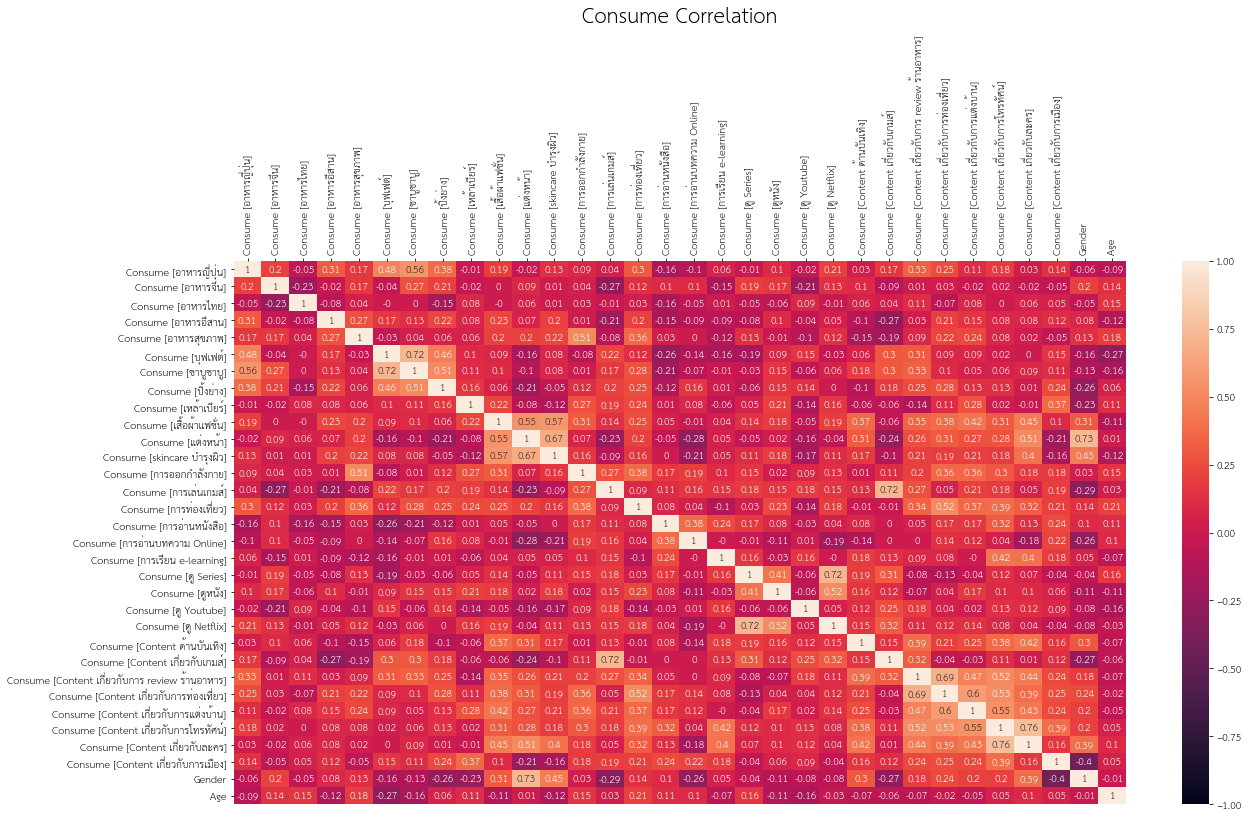

In [39]:
mpl.rcParams.update({'font.size': 10})
plt.figure(figsize=(20, 10))
hm_consume = sns.heatmap(df_corr_consume, vmin=-1, vmax=1, annot=True)
hm_consume.set_title('Consume Correlation', fontdict={'fontsize':20}, pad=12);
hm_consume.set_xticklabels(hm_consume.get_xticklabels(), rotation=90)
hm_consume.xaxis.tick_top()
hm_consume.xaxis.set_label_position('top')
plt.show()

In [40]:
#Top Interest correlation positive
labels_to_drop = get_redundant_pairs(df_encode_consume)
corr_consume_top_pos = df_corr_consume.unstack()
corr_consume_top_pos = corr_consume_top_pos.drop(labels=labels_to_drop).sort_values(ascending=False)
top_corr_consume = corr_consume_top_pos.head(20).to_frame(name='Correlation')
left_align(top_corr_consume)

,,Correlation
Consume [Content เกี่ยวกับการโทรทัศน์],Consume [Content เกี่ยวกับละคร],0.760000
Consume [แต่งหน้า],Gender,0.730000
Consume [บุฟเฟต์],Consume [ชาบูชาบู],0.720000
Consume [การเล่นเกมส์],Consume [Content เกี่่ยวกับเกมส์],0.720000
Consume [ดู Series],Consume [ดู Netflix],0.720000
Consume [Content เกี่ยวกับการ review ร้านอาหาร],Consume [Content เกี่ยวกับการท่องเที่ยว],0.690000
Consume [แต่งหน้า],Consume [skincare บำรุงผิว],0.670000
Consume [Content เกี่ยวกับการท่องเที่ยว],Consume [Content เกี่ยวกับการแต่งบ้าน],0.600000
Consume [เสื้อผ้าแฟชั่น],Consume [skincare บำรุงผิว],0.570000
Consume [อาหารญี่ปุ่น],Consume [ชาบูชาบู],0.560000


In [41]:
#Top Interest correlation negative
labels_to_drop = get_redundant_pairs(df_encode_consume)
corr_consume_top_pos = df_corr_consume.unstack()
corr_consume_top_pos = corr_consume_top_pos.drop(labels=labels_to_drop).sort_values(ascending=True)
top_corr_consume = corr_consume_top_pos.head(20).to_frame(name='Correlation')
left_align(top_corr_consume)

,,Correlation
Consume [Content เกี่ยวกับการเมือง],Gender,-0.400000
Consume [การเล่นเกมส์],Gender,-0.290000
Consume [แต่งหน้า],Consume [การอ่านบทความ Online],-0.280000
Consume [บุฟเฟต์],Age,-0.270000
Consume [อาหารจึน],Consume [การเล่นเกมส์],-0.270000
Consume [อาหารอีสาน],Consume [Content เกี่่ยวกับเกมส์],-0.270000
Consume [Content เกี่่ยวกับเกมส์],Gender,-0.270000
Consume [การอ่านบทความ Online],Gender,-0.260000
Consume [ปิ้งย่าง],Gender,-0.260000
Consume [บุฟเฟต์],Consume [การอ่านหนังสือ],-0.260000


In [48]:
df_prep_buy = df_encode_interest_da.drop(columns=['Gender'])
mapper_int = {1 : 0 , 2 : 0 , 3 : 0 , 4 : 0 
             ,5 : 0 , 6 : 1 , 7 : 1
             }
df_buy = df_prep_buy.replace(mapper_int)
df_buy['Customer_ID'] = df_buy.index

# Recommendation Engine Item Based

In [51]:
df_prep_buy = df_encode_interest_da.drop(columns=['Gender'])
df_prep_buy.head(5)

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง]
0,5,5,7,6,5,5,5,5,7,4,3,5,6,6,4,5,5,7,6,6,5,7,5,6,6,4,4,4,4,7
1,6,4,7,6,5,6,7,6,3,4,4,4,6,6,7,7,7,7,4,7,7,6,4,4,6,7,7,4,3,5
2,7,4,6,5,4,7,7,7,2,4,1,2,5,7,7,7,7,4,7,7,7,7,7,7,7,7,7,6,3,7
3,5,4,4,4,5,5,5,5,1,1,1,7,6,7,7,5,5,6,7,7,7,7,1,7,4,5,4,3,1,6
4,6,5,5,5,7,4,4,4,4,4,5,6,7,3,5,6,5,5,7,7,4,7,4,3,4,5,5,3,3,4


In [73]:
data_ibs = pd.DataFrame(index=df_prep_buy.columns,columns=df_prep_buy.columns)

In [74]:
from scipy.spatial.distance import cosine
for i in range(0,len(data_ibs.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(data_ibs.columns)) :
      # Fill in placeholder with cosine similarities
      data_ibs.iloc[i,j] = 1-cosine(df_prep_buy.iloc[:,i],df_prep_buy.iloc[:,j])     
data_ibs.head(5)

,Interest [อาหารญี่ปุ่น],Interest [อาหารจึน],Interest [อาหารไทย],Interest [อาหารอีสาน],Interest [อาหารสุขภาพ],Interest [บุฟเฟต์],Interest [ชาบูชาบู],Interest [ปิ้งย่าง],Interest [เหล้าเบียร์],Interest [เสื้อผ้าแฟชั่น],Interest [แต่งหน้า],Interest [skincare บำรุงผิว],Interest [การออกกำลังกาย],Interest [การเล่นเกมส์],Interest [การท่องเที่ยว],Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],Interest [การเรียน e-learning],Interest [ดู Series],Interest [ดูหนัง],Interest [ดู Youtube],Interest [ดู Netflix],Interest [Content ด้านบันเทิง],Interest [Content เกี่่ยวกับเกมส์],Interest [Content เกี่ยวกับการ review ร้านอาหาร],Interest [Content เกี่ยวกับการท่องเที่ยว],Interest [Content เกี่ยวกับการแต่งบ้าน],Interest [Content เกี่ยวกับการโทรทัศน์],Interest [Content เกี่ยวกับละคร],Interest [Content เกี่ยวกับการเมือง]
Interest [อาหารญี่ปุ่น],1,0.964918,0.97569,0.967257,0.953191,0.975955,0.987815,0.980568,0.885123,0.948818,0.869175,0.934275,0.962552,0.94801,0.975675,0.961191,0.968677,0.976284,0.976163,0.975732,0.978064,0.977441,0.945509,0.934667,0.976419,0.975365,0.945509,0.930331,0.913364,0.939038
Interest [อาหารจึน],0.964918,1,0.950708,0.942247,0.947784,0.938893,0.955021,0.960136,0.882392,0.917489,0.85627,0.9104,0.942133,0.907757,0.959626,0.934344,0.942766,0.960543,0.957665,0.955129,0.956325,0.95616,0.928663,0.889782,0.938226,0.952674,0.928007,0.92428,0.913505,0.915003
Interest [อาหารไทย],0.97569,0.950708,1,0.981048,0.956566,0.955865,0.96987,0.966249,0.904609,0.953474,0.887357,0.938808,0.965834,0.937014,0.971109,0.950282,0.956774,0.976266,0.968617,0.967388,0.97481,0.976626,0.951446,0.922681,0.963856,0.970656,0.949779,0.941203,0.927673,0.949524
Interest [อาหารอีสาน],0.967257,0.942247,0.981048,1,0.956667,0.944268,0.956499,0.947519,0.88785,0.954432,0.876914,0.937354,0.949291,0.910623,0.958873,0.944968,0.950889,0.966543,0.95825,0.964595,0.966835,0.967469,0.936802,0.896713,0.948632,0.961309,0.944022,0.92046,0.908521,0.941394
Interest [อาหารสุขภาพ],0.953191,0.947784,0.956566,0.956667,1,0.932483,0.947279,0.939586,0.863737,0.937165,0.861371,0.935135,0.962663,0.911104,0.954508,0.953948,0.957974,0.963703,0.951091,0.948287,0.949682,0.951059,0.913139,0.888511,0.937077,0.954797,0.9318,0.925349,0.897994,0.93706


In [75]:
links = data_ibs.stack().reset_index()
links.columns = ['Pair1', 'Pair2','Value']

In [76]:
links_filtered=links.loc[ (links['Value'] > 0.5) & (links['Pair1'] != links['Pair2']) ]
links_filtered_top = links_filtered.sort_values(by='Value',ascending=False)
links_filtered_top.head(60)

,Pair1,Pair2,Value
648,Interest [ดู Netflix],Interest [ดู Series],0.989677
561,Interest [ดู Series],Interest [ดู Netflix],0.989677
495,Interest [การอ่านบทความ Online],Interest [การอ่านหนังสือ],0.988689
466,Interest [การอ่านหนังสือ],Interest [การอ่านบทความ Online],0.988689
559,Interest [ดู Series],Interest [ดูหนัง],0.9881
588,Interest [ดูหนัง],Interest [ดู Series],0.9881
6,Interest [อาหารญี่ปุ่น],Interest [ชาบูชาบู],0.987815
180,Interest [ชาบูชาบู],Interest [อาหารญี่ปุ่น],0.987815
216,Interest [ปิ้งย่าง],Interest [ชาบูชาบู],0.987714
187,Interest [ชาบูชาบู],Interest [ปิ้งย่าง],0.987714


# Recommendation Engine User Based

In [248]:
product=[]
kv_pd=[]
cnt=100
for i in df_prep_buy:
  kv_pd.append(cnt)
  kv_pd.append(i)
  product.append(kv_pd)
  kv_pd=[]
  cnt+=1
df_product = pd.DataFrame(product,columns=['Product_ID','product_name'])
df_product = df_product.drop(df_product[df_product.product_name == 'customer_id'].index)
df_product = df_product.drop(df_product[df_product.product_name == 'Customer_ID'].index)
df_product.head()

,Product_ID,product_name
0,100,Interest [อาหารญี่ปุ่น]
1,101,Interest [อาหารจึน]
2,102,Interest [อาหารไทย]
3,103,Interest [อาหารอีสาน]
4,104,Interest [อาหารสุขภาพ]


In [249]:
from sklearn.metrics.pairwise import cosine_similarity
df_prep_buy['Customer_ID'] = df_prep_buy.index
df_prep_buy_unpivoted = df_prep_buy.melt(id_vars=['Customer_ID'], var_name='Product', value_name='Rating')
df_prep_buy_unpivoted['Rating_Avg'] = df_prep_buy_unpivoted.mean()[1]
df_prep_buy_unpivoted['adg_rating']=df_prep_buy_unpivoted['Rating']-df_prep_buy_unpivoted['Rating_Avg']
df_transaction = df_prep_buy_unpivoted.merge(df_product, left_on='Product', right_on='product_name')
df_transaction = df_transaction.drop(columns=['Product','product_name'])
df_transaction

,Customer_ID,Rating,Rating_Avg,adg_rating,Product_ID
0,0,5,5.882414,-0.882414,100
1,1,6,5.882414,0.117586,100
2,2,7,5.882414,1.117586,100
3,3,5,5.882414,-0.882414,100
4,4,6,5.882414,0.117586,100
...,...,...,...,...,...
1855,57,3,5.882414,-2.882414,129
1856,58,4,5.882414,-1.882414,129
1857,59,6,5.882414,0.117586,129
1858,60,4,5.882414,-1.882414,129


In [274]:
check = pd.pivot_table(df_transaction,values='Rating',index='Customer_ID',columns='Product_ID')

In [251]:
final=pd.pivot_table(df_transaction,values='adg_rating',index='Customer_ID',columns='Product_ID')
final= final.fillna(final.mean(axis=0))
final.head(5)

Product_ID,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.882414,-0.882414,1.117586,0.117586,-0.882414,-0.882414,-0.882414,-0.882414,1.117586,-1.882414,-2.882414,-0.882414,0.117586,0.117586,-1.882414,-0.882414,-0.882414,1.117586,0.117586,0.117586,-0.882414,1.117586,-0.882414,0.117586,0.117586,-1.882414,-1.882414,-1.882414,-1.882414,1.117586
1,0.117586,-1.882414,1.117586,0.117586,-0.882414,0.117586,1.117586,0.117586,-2.882414,-1.882414,-1.882414,-1.882414,0.117586,0.117586,1.117586,1.117586,1.117586,1.117586,-1.882414,1.117586,1.117586,0.117586,-1.882414,-1.882414,0.117586,1.117586,1.117586,-1.882414,-2.882414,-0.882414
2,1.117586,-1.882414,0.117586,-0.882414,-1.882414,1.117586,1.117586,1.117586,-3.882414,-1.882414,-4.882414,-3.882414,-0.882414,1.117586,1.117586,1.117586,1.117586,-1.882414,1.117586,1.117586,1.117586,1.117586,1.117586,1.117586,1.117586,1.117586,1.117586,0.117586,-2.882414,1.117586
3,-0.882414,-1.882414,-1.882414,-1.882414,-0.882414,-0.882414,-0.882414,-0.882414,-4.882414,-4.882414,-4.882414,1.117586,0.117586,1.117586,1.117586,-0.882414,-0.882414,0.117586,1.117586,1.117586,1.117586,1.117586,-4.882414,1.117586,-1.882414,-0.882414,-1.882414,-2.882414,-4.882414,0.117586
4,0.117586,-0.882414,-0.882414,-0.882414,1.117586,-1.882414,-1.882414,-1.882414,-1.882414,-1.882414,-0.882414,0.117586,1.117586,-2.882414,-0.882414,0.117586,-0.882414,-0.882414,1.117586,1.117586,-1.882414,1.117586,-1.882414,-2.882414,-1.882414,-0.882414,-0.882414,-2.882414,-2.882414,-1.882414


In [252]:
# Replacing NaN by Product Average
final_product = final.fillna(final.mean(axis=0))
# Replacing NaN by user Average
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)

In [275]:
# user similarity on replacing NAN by user avg
b = cosine_similarity(final_user)
np.fill_diagonal(b, 0 )
similarity_with_user = pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
#similarity_with_user.head()

In [254]:
# user similarity on replacing NAN by item(product) avg
cosine = cosine_similarity(final_product)
np.fill_diagonal(cosine, 0 )
similarity_with_product = pd.DataFrame(cosine,index=final_product.index)
similarity_with_product.columns=final_product.index
similarity_with_product.head()

Customer_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.220349,0.179530,0.524828,0.422429,0.223830,-0.115556,0.489707,0.503163,0.618346,0.536356,-0.053406,-0.144221,0.662839,0.437865,0.025026,-0.151671,0.539694,0.289591,0.320601,0.571593,0.603221,0.595686,0.472453,0.284302,0.607341,0.298877,0.356930,0.510772,0.357403,0.571514,-0.119261,0.202333,0.499506,0.271655,0.232228,0.165328,0.241751,-0.215252,0.088120,0.264758,0.179690,0.300983,0.555782,0.162760,0.008165,0.362052,0.637030,0.416977,0.282086,0.180186,0.521145,0.169802,0.594108,0.424304,0.290081,0.588009,0.406787,0.255117,0.374139,0.241921,-0.184891
1,0.220349,0.000000,0.594427,0.555737,0.349104,-0.008804,0.222143,0.604052,0.526211,0.317109,0.311997,0.320069,0.033460,0.459603,0.553183,0.528042,0.244590,0.431143,0.454635,0.512347,0.282432,0.618749,0.388440,0.626522,0.417744,0.503143,0.531265,0.226345,0.545814,0.581558,0.506171,0.532068,0.327953,0.336288,0.473005,0.656715,0.633990,0.369250,0.301300,0.546335,0.427793,0.245922,0.428315,0.456542,0.233209,0.138296,0.446681,0.508441,0.599373,0.516661,0.467272,0.282132,0.501850,0.545483,0.488568,0.366148,0.507420,0.222935,0.073176,0.373009,0.343278,0.344128
2,0.179530,0.594427,0.000000,0.470957,0.027888,0.307889,-0.142567,0.424912,0.790314,0.072662,0.177556,-0.015841,0.331921,0.554728,0.228448,0.275193,0.106434,0.354764,0.174713,0.534777,0.376363,0.331723,0.406813,0.427681,0.256468,0.416685,0.438552,0.107950,0.607069,0.254806,0.297451,0.627029,0.516109,0.206892,0.248585,0.621721,0.345266,0.279082,0.277453,0.171982,0.095345,-0.114205,0.324180,0.428318,0.083314,-0.056968,0.378519,0.361866,0.196385,0.277556,0.094462,0.112807,0.389794,0.424100,0.180986,0.311167,0.643233,-0.143575,-0.120786,0.492980,0.050089,0.365048
3,0.524828,0.555737,0.470957,0.000000,0.568282,0.079523,-0.049039,0.394668,0.646659,0.486746,0.451556,0.114207,0.194113,0.612379,0.508316,0.185941,0.065510,0.536630,0.632035,0.675126,0.632665,0.647069,0.542480,0.790473,0.337027,0.811278,0.574628,0.307912,0.546368,0.480791,0.546383,0.340962,0.247708,0.569002,0.530193,0.552718,0.620374,0.378583,0.103537,0.396111,0.340779,0.233644,0.651216,0.685136,0.329217,0.031291,0.506244,0.648603,0.603596,0.225066,0.326003,0.519939,0.459384,0.738890,0.350984,0.577529,0.467555,0.466638,0.114370,0.539438,0.529532,0.280657
4,0.422429,0.349104,0.027888,0.568282,0.000000,-0.196652,0.403333,0.480356,0.197782,0.546480,0.297720,0.578920,-0.047525,0.260082,0.572134,0.345997,0.414485,0.492005,0.761892,0.536103,0.443975,0.654576,0.428754,0.673579,0.441018,0.565491,0.553102,0.536499,0.390041,0.563472,0.269853,0.152729,0.092667,0.600662,0.614398,0.343835,0.429121,0.252279,-0.075289,0.634705,0.705935,0.599899,0.580097,0.370973,0.329804,0.335060,0.331684,0.631095,0.687883,0.423717,0.633274,0.689370,0.528125,0.498230,0.372799,0.427877,0.271400,0.755087,0.549043,0.288797,0.618717,0.030801


In [255]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [256]:
# top 30 neighbours for each user
sim_user_30_u = find_n_neighbours(similarity_with_user,30)
sim_user_30_u.head() 

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,top11,top12,top13,top14,top15,top16,top17,top18,top19,top20,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,13,47,9,25,21,22,53,56,20,30,43,17,10,3,51,28,8,33,7,23,14,54,4,48,57,59,46,29,27,19
1,35,36,23,21,7,48,2,29,3,14,39,28,53,31,26,15,8,49,19,47,56,30,25,52,54,34,50,13,43,18
2,8,56,31,35,28,1,13,19,32,59,3,26,43,23,7,53,25,22,52,46,20,61,47,17,36,12,21,42,55,5
3,25,23,53,43,19,42,47,21,8,20,18,36,13,48,55,26,33,4,1,35,30,28,22,59,17,34,60,0,51,14
4,18,57,40,51,48,23,21,39,50,47,60,34,33,41,42,11,14,3,25,29,26,58,9,27,19,52,53,17,7,20


In [257]:
# top 30 neighbours for each user
sim_user_30_m = find_n_neighbours(similarity_with_product,30)
sim_user_30_m.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,top11,top12,top13,top14,top15,top16,top17,top18,top19,top20,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,13,47,9,25,21,22,53,56,20,30,43,17,10,3,51,28,8,33,7,23,14,54,4,48,57,59,46,29,27,19
1,35,36,23,21,7,48,2,29,3,14,39,28,53,31,26,15,8,49,19,47,56,30,25,52,54,34,50,13,43,18
2,8,56,31,35,28,1,13,19,32,59,3,26,43,23,7,53,25,22,52,46,20,61,47,17,36,12,21,42,55,5
3,25,23,53,43,19,42,47,21,8,20,18,36,13,48,55,26,33,4,1,35,30,28,22,59,17,34,60,0,51,14
4,18,57,40,51,48,23,21,39,50,47,60,34,33,41,42,11,14,3,25,29,26,58,9,27,19,52,53,17,7,20


In [258]:
def get_user_similar_product( user1, user2 ):
    common_product = df_transaction[df_transaction.Customer_ID == user1].merge(
    df_transaction[df_transaction.Customer_ID == user2],
    on = "Product_ID",
    how = "inner" )
    return common_product.merge( df_product, on = 'Product_ID' )

In [260]:
a = get_user_similar_product(1,2)
a = a.loc[ : , ['Rating_x','Rating_y','product_name']]
a.head()

,Rating_x,Rating_y,product_name
0,6,7,Interest [อาหารญี่ปุ่น]
1,4,4,Interest [อาหารจึน]
2,7,6,Interest [อาหารไทย]
3,6,5,Interest [อาหารอีสาน]
4,5,4,Interest [อาหารสุขภาพ]


In [261]:
def User_item_score(user,item):
    a = sim_user_30_m[sim_user_30_m.index==user].values
    b = a.squeeze().tolist()
    c = final_product.loc[:,item]
    d = c[c.index.isin(b)]
    f = d[d.notnull()]
    avg_user = df_transaction['Rating_Avg'].values[0]
    index = f.index.values.squeeze().tolist()
    corr = similarity_with_product.loc[user,index]
    fin = pd.concat([f, corr], axis=1)
    fin.columns = ['adg_score','correlation']
    fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
    nume = fin['score'].sum()
    deno = fin['correlation'].sum()
    final_score = avg_user + (nume/deno)
    return final_score

In [266]:
user_product_score = []
ups=[]
for user,product in zip(df_transaction.Customer_ID, df_transaction.Product_ID): 
    ups.append(user)
    ups.append(product)
    ups.append(User_item_score(int(user),int(product)))    
    user_product_score.append(ups)
    ups=[]
df_user_product_score = pd.DataFrame(user_product_score,columns=['Customer_ID','Product_ID','Score'])
df_user_product_score_tl = df_user_product_score.merge(df_product, left_on='Product_ID', right_on='Product_ID')
df_user_product_score_tl

,Customer_ID,Product_ID,Score,product_name
0,0,100,5.889617,Interest [อาหารญี่ปุ่น]
1,1,100,6.275855,Interest [อาหารญี่ปุ่น]
2,2,100,6.235161,Interest [อาหารญี่ปุ่น]
3,3,100,6.075530,Interest [อาหารญี่ปุ่น]
4,4,100,5.792967,Interest [อาหารญี่ปุ่น]
...,...,...,...,...
1855,57,129,3.942848,Interest [Content เกี่ยวกับการเมือง]
1856,58,129,4.124229,Interest [Content เกี่ยวกับการเมือง]
1857,59,129,5.179363,Interest [Content เกี่ยวกับการเมือง]
1858,60,129,3.979567,Interest [Content เกี่ยวกับการเมือง]


In [278]:
id = int(input('Enter Customer ID : '))
df_user_product_score_iden=df_user_product_score_tl.loc[df_user_product_score_tl['Customer_ID']== id]
df_user_product_score_iden_sort=df_user_product_score_iden.sort_values(by='Score', ascending=False)  
df_user_product_score_iden_sort.head(5)

Enter Customer ID : 19


,Customer_ID,Product_ID,Score,product_name
19,19,100,6.191534,Interest [อาหารญี่ปุ่น]
887,19,114,5.976602,Interest [การท่องเที่ยว]
1259,19,120,5.722261,Interest [ดู Youtube]
1197,19,119,5.683945,Interest [ดูหนัง]
1321,19,121,5.662695,Interest [ดู Netflix]


# Explore Addition WordCloud

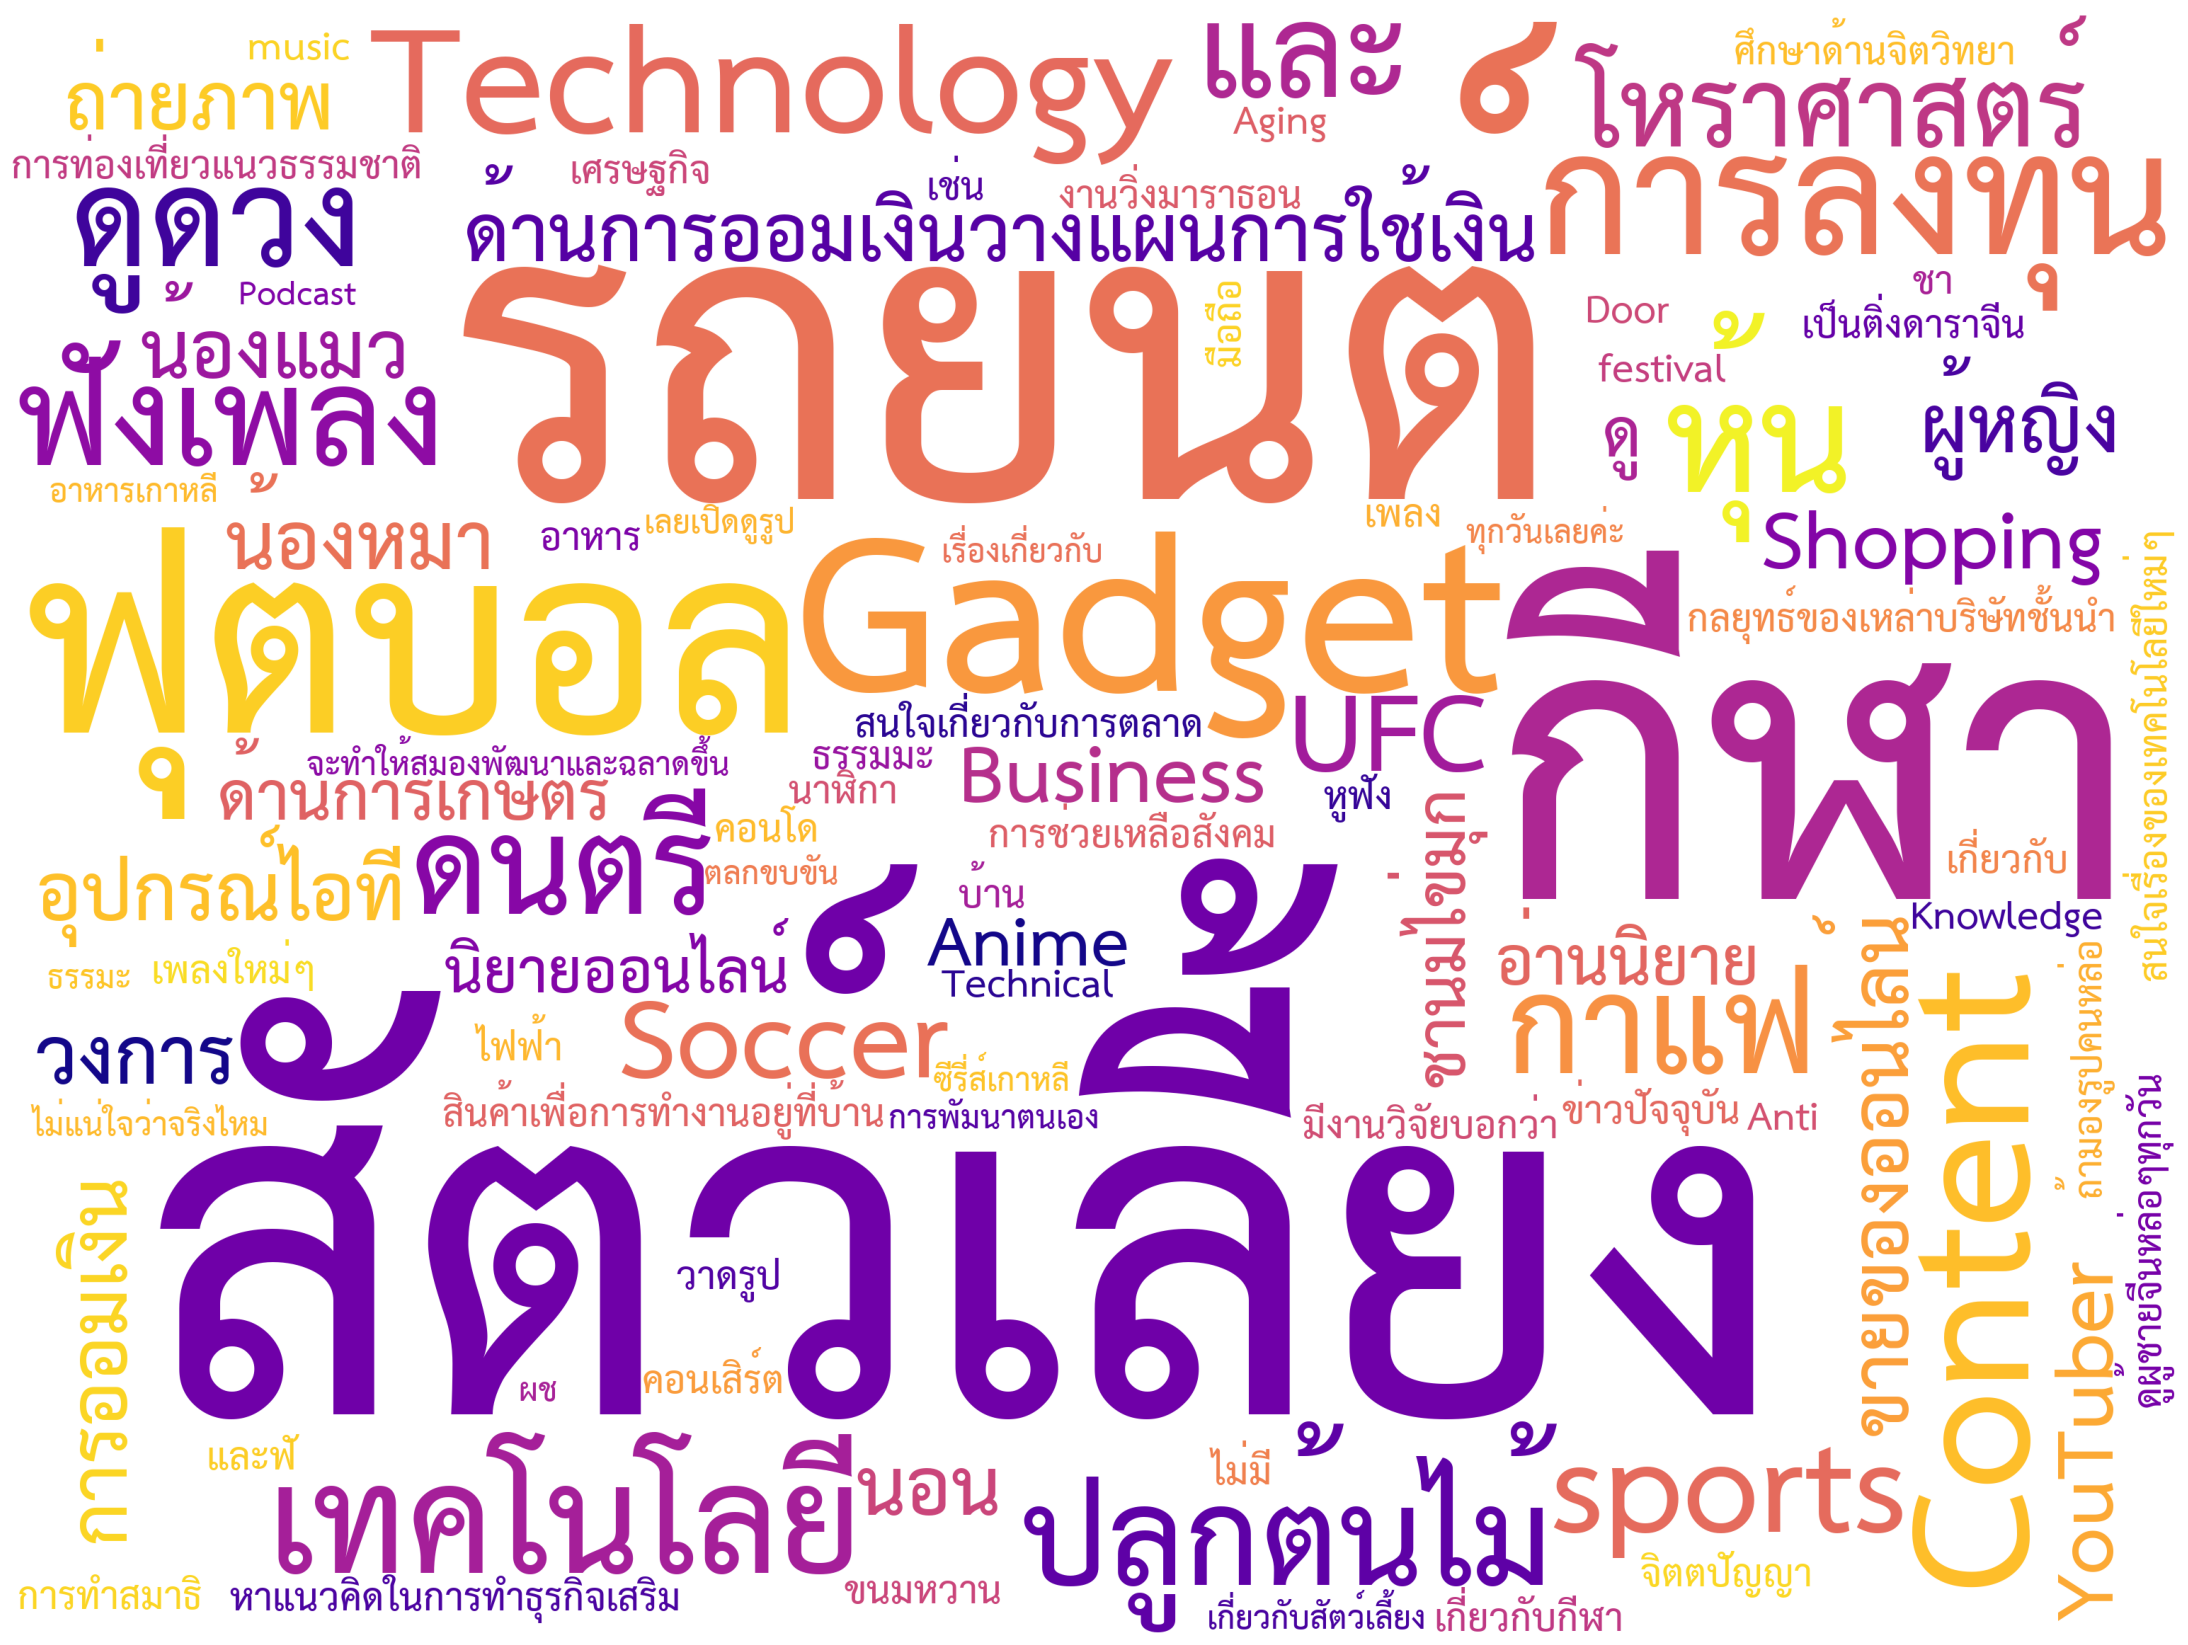

In [42]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
regexp = r"[ก-๙a-zA-Z']+"    
path = '/content/gdrive/My Drive/BADS_NIDA/CRM/THSarabunNewBold.ttf'  

text=''
for index,row in df_option.iterrows():
  for e in row['Addition'].split(','):
    for e1 in e.split(' '):
      text+= e1+' '

# Import package
#import wordcloud
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud

try:
  wordcloud = WordCloud(
                        font_path=path, 
                        relative_scaling = 0.3,
                        min_font_size=1,
                        background_color="white",
                        width=1024,
                        height=768,
                        max_words=2000, 
                        #mask=mask,
                        colormap='plasma', 
                        scale=3,
                        font_step=4,
                      #   contour_width=3, 
                      #   contour_color='steelblue', 
                        collocations=False,
                        regexp=regexp,
                        margin=2
                        ).generate(text)

  # Plot
  plot_cloud(wordcloud)    
  plt.show()
  wordcloud.to_file("/content/gdrive/My Drive/BADS_NIDA/CRM/AdditionUserFav.png")
except:
  print('WordCloud file is in path:https://github.com/PisutSukpool/BADS7105-CRM-analytics-and-intelligence/raw/main/Homework%2001/AdditionUserFav.png')